In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to your balanced dataset
balanced_dataset_path = '/kaggle/input/breakhis-400x/Breakhis-400x'

# Set the image dimensions and other parameters
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 2
epochs = 100

# Create the data generator for training and validation without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate the class weights to handle data imbalance
class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator_balanced, epochs=epochs, validation_data=validation_generator_balanced, class_weight=class_weights_balanced)

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print('Loss:',loss)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Found 1457 images belonging to 2 classes.
Found 363 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724507189.292014      82 service.cc:145] XLA service 0x796724004e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724507189.292067      82 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724507189.292073      82 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/46 ━━━━━━━━━━━━━━━━━━━━ 7:24 10s/step - accuracy: 0.6875 - loss: 0.6330

I0000 00:00:1724507195.284805      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 388ms/step - accuracy: 0.5803 - loss: 0.9996 - val_accuracy: 0.8485 - val_loss: 0.4970
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.6988 - loss: 0.6529 - val_accuracy: 0.6501 - val_loss: 0.6139
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7959 - loss: 0.5367 - val_accuracy: 0.6804 - val_loss: 0.5323
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8110 - loss: 0.5131 - val_accuracy: 0.7410 - val_loss: 0.5253
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7935 - loss: 0.4995 - val_accuracy: 0.5647 - val_loss: 0.6986
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7906 - loss: 0.5056 - val_accuracy: 0.7796 - val_loss: 0.5213
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.7793 - loss: 0.5494 - val_accuracy: 0.8209 - val_loss: 0.4409
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8176 - loss: 0.5023 - val_accuracy: 0.820

In [2]:
# Check the model summary to find the correct layer name
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,038,664 (110.77 MB)

 Trainable params: 9,679,554 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,359,110 (73.85 MB)

57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step


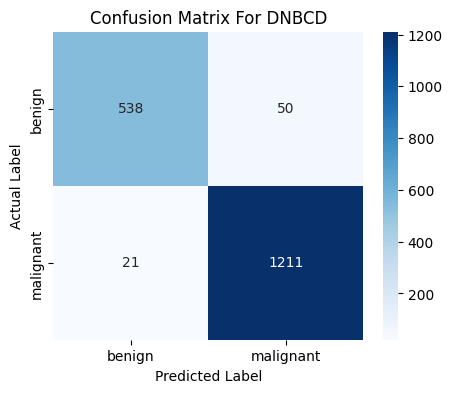

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot the confusion matrix
beingsaved = plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix For DNBCD')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
beingsaved.savefig('Confusion.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Load and preprocess the input image
input_image = image.load_img('/kaggle/input/breakhis-400x/Breakhis-400x/benign/SOB_B_A-14-22549AB-400-001.png', target_size=(224, 224))
input_image = image.img_to_array(input_image)
input_image = np.expand_dims(input_image, axis=0)

class_names = ['Benign', 'Malignant']

# Get the predicted class probabilities
predictions = model.predict(input_image)

# Determine the predicted class
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
Predicted class: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


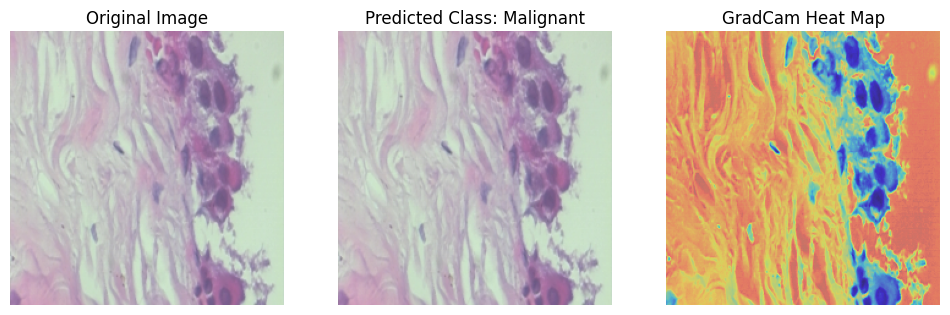

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

def plot_heatmap(image_path):
    
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    # Create a model that outputs the image
    inputs = Input(shape=x.shape[1:])
    model = Model(inputs=inputs, outputs=inputs)
    
    # Compute the heatmap
    conv_output = model.predict(x)[0]
    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    # Plot the original image and the heatmap
    fig,(ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(12, 6))
    beingsaved=fig
    
    # Plot the original image
    ax1.imshow(image.load_img(image_path))
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    # Plot the original image
    ax2.imshow(image.load_img(image_path))
    ax2.set_title(f'Predicted Class: {class_names[predicted_class]}')
    ax2.axis('off')
    
    # Plot the heatmap
    ax3.imshow(image.load_img(image_path))
    ax3.imshow(heatmap, cmap='jet', alpha=0.5)
    ax3.set_title('GradCam Heat Map')
    ax3.axis('off')
    
    beingsaved.savefig('Output1.png', format='png', dpi=600, bbox_inches="tight")
    plt.show()

# Example usage
image_path = '/kaggle/input/breakhis-400x/Breakhis-400x/benign/SOB_B_A-14-22549AB-400-001.png'

plot_heatmap(image_path)